### Importing Libraries and Dataset
- Using MNIST dataset 
- Using keras to implement a simple NN
- As this is a simple dataset relatively small NN is implented

In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist # Images of digits 0-9 in 28x28 resolution

Using TensorFlow backend.


### Normalization and Train-Test Split

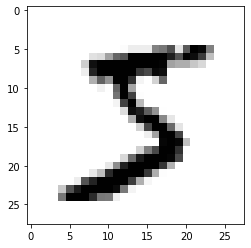

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

### Model
- Model has 2 hidden layers and 1 output layer
- Each hidden layer contains 128 neurons 
- Each hidden layer used ReLU activation
- Softmax activation is used on the output layer
- ADAM is used as an optimizer to reduce the sparse categorical crossentropy

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Training

In [4]:
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2616 - accuracy: 0.9236
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1086 - accuracy: 0.9658
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0723 - accuracy: 0.9768
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0539 - accuracy: 0.9826
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0391 - accuracy: 0.9870


### Test
- Model is evaluated on the test set 
- Model is accurately predicting the handwritten numbers with 97.24% accuracy
- Model does not have variance problem

In [5]:
val_loss, val_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0909 - accuracy: 0.9724


Model is saved for the future use

In [6]:
model.save('mnist_model.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_model.model\assets


### Check on examples

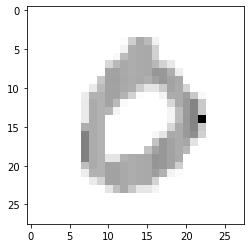

Prediction: 0


In [7]:
index = 3
plt.imshow(X_test[index], cmap=plt.cm.binary)
plt.show()
predictions = model.predict(X_test)
print('Prediction: '+str(np.argmax(predictions[index])))